<a href="https://colab.research.google.com/github/LoPA607/WIDS-NetWeaver/blob/main/final_WIDS_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from  numpy import random
np.random.seed(100)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree



In [ ]:
import pickle

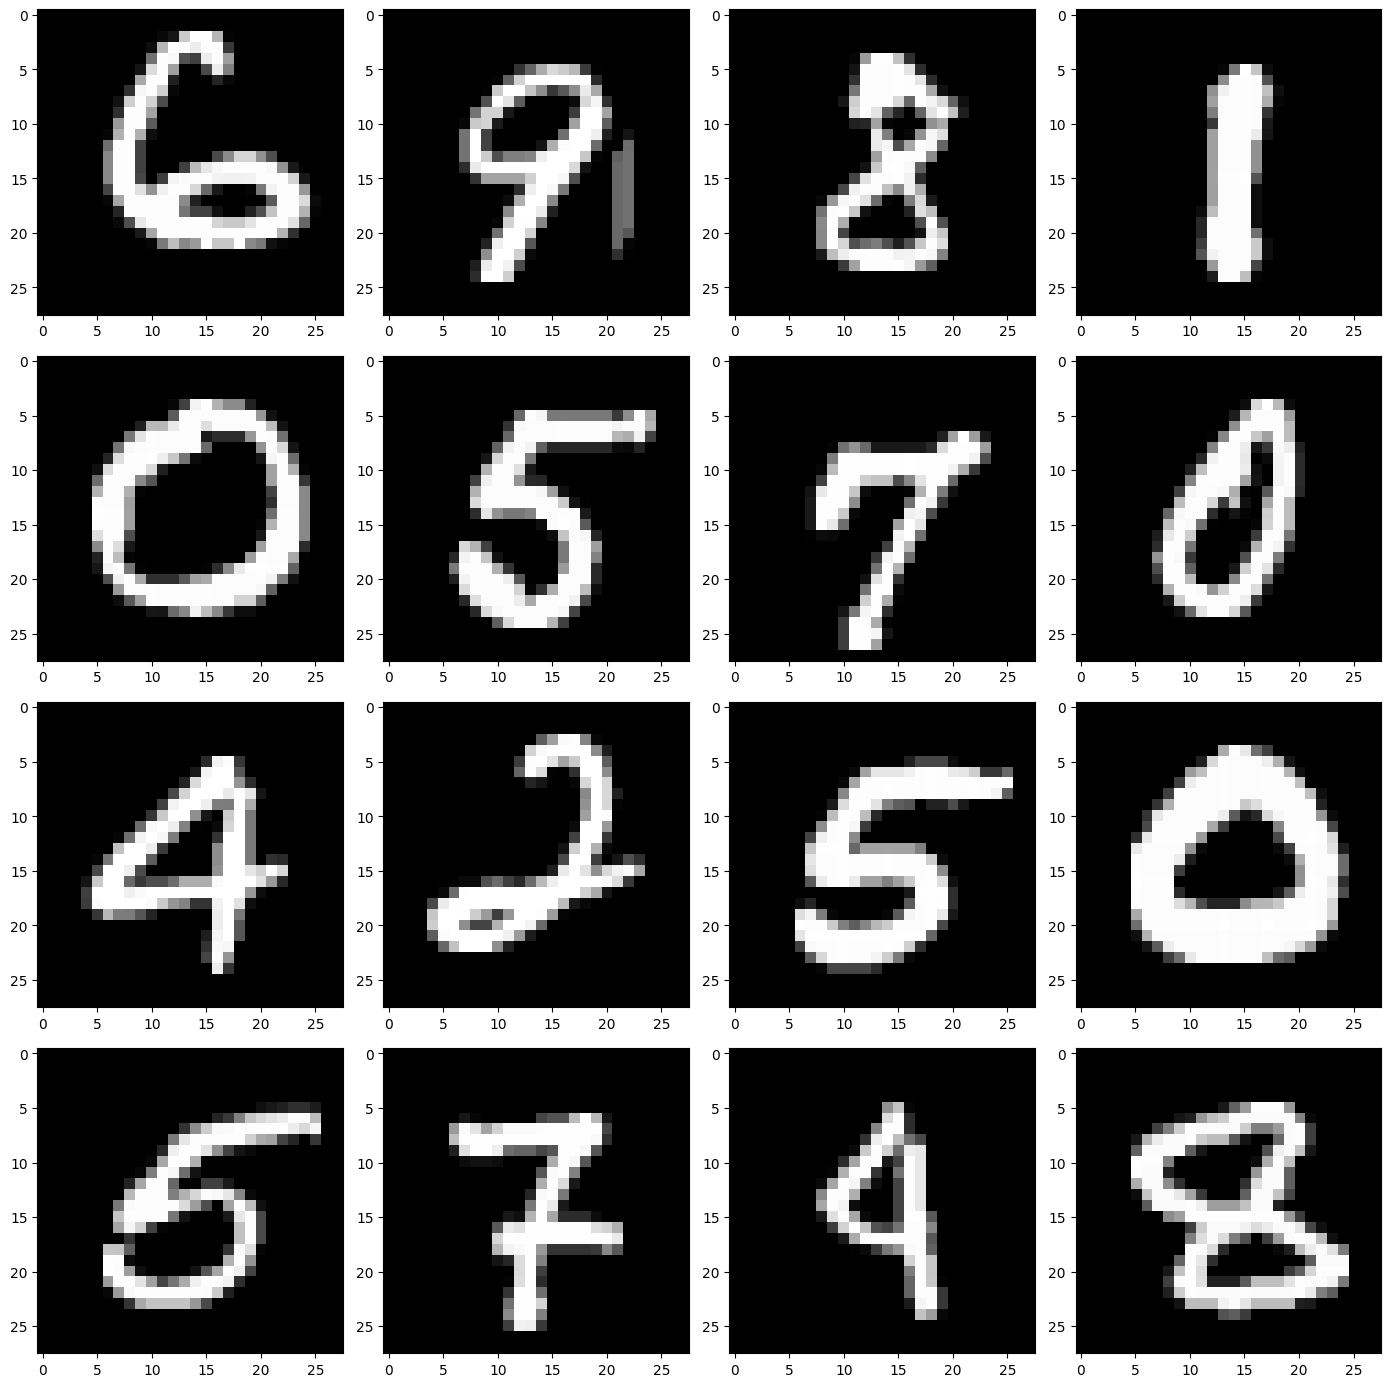

In [ ]:
data_file='MNIST_data.pkl'
with open(data_file,'rb') as infile:
  train_dataset=pickle.load(infile)
X=train_dataset['X']
y=train_dataset['y']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=1000,shuffle=False)


grid_size = 4
fig, ax = plt.subplots(grid_size, grid_size, figsize=(14,14))
for i in range(grid_size):
    for j in range(grid_size):
        ax[i,j].imshow(X[i*grid_size+j].reshape(28,28),cmap='gray')
        ax[i,j].axis('on')

plt.tight_layout()
plt.show()


In [ ]:
def relu(z):
  return np.maximum(0,z)
  pass


def softmax(x, axis=1):
    exp_x = np.exp(x - np.max(x, axis=axis,keepdims=True))
    return exp_x / np.sum(exp_x,axis=axis,keepdims=True)
    pass


In [ ]:
import math
def init_params():
        input_nodes=784
        hidden_nodes=256
        output_nodes=10
        w1= np.random.randn(input_nodes, hidden_nodes) * 0.01
        bias1= np.zeros((hidden_nodes, 1))
        w2= np.random.randn(hidden_nodes, output_nodes) * 0.01
        bias2= np.zeros((output_nodes, 1))
        return w1,bias1,w2,bias2,input_nodes,hidden_nodes,output_nodes



pass

In [ ]:
def forward_propg(X,w1,w2,bias1,bias2):

   z1=np.dot(X,w1)+bias1.T
   f1=relu(z1)
   z2=np.dot(f1,w2)+bias2.T
   f2=softmax(z2)

   return z1,z2,f1,f2
   pass

def relu_derivative(x):
  return np.where(x > 0, 1, 0)
  pass


In [ ]:
def backward_propg(X,y,w1,w2,bias1,bias2,f1,f2,lr):
  N=X.shape[0]
  dz2 = f2/N
  for i in range(N):
    dz2[i][y[i]]-=1/N

  dw2 = np.dot(f1.T,dz2)
  db2 = np.sum(dz2, axis=0, keepdims=True).T
  df1 = np.dot(dz2,w2.T)
  d_relu=df1*(f1>0)
  dw1 = np.dot(X.T,d_relu)
  db1 = np.sum(d_relu, axis=0, keepdims=True).T
  w2-= lr * dw2
  bias2 -= lr * db2
  w1 -= lr * dw1
  bias1 -= lr * db1
  return w1,bias1,w2,bias2

  pass



In [ ]:
def cost_func(z2,f2,y):
  loss=0
  m=np.size(z2,0)
  for i in range(m):
        loss+= -np.log(f2[i][ y[i]])/(np.size(z2,0))


  return loss


  pass

In [ ]:
def train(X,y,hidden_nodes,epochs,lr):
  w1,bias1,w2,bias2,input_nodes,hidden_nodes,output_nodes=init_params()
  relu_derivative
  for i in range(epochs):
    z1,z2,f1,f2=forward_propg(X,w1,w2,bias1,bias2)
    loss=cost_func(z2,f2,y_train)
    w1,bias1,w2,bias2= backward_propg(X,y,w1,w2,bias1,bias2,f1,f2,lr)

    if i % 25== 0:
       print("Cost at 25th iteration %d:%f" % (i,loss))
  return w1,w2,bias1,bias2
  pass


In [ ]:
def predict(X,w1,w2,bias1,bias2):
    z1_test,z2_test,f1_test,f2_test=forward_propg(X,w1,w2,bias1,bias2)
    predictions=np.argmax(f2_test,axis=1)
    predictions = predictions.reshape([X.shape[0],1])
    print(predictions.shape)
    return predictions

In [ ]:
def accuracy(pred,y):
    acc=np.mean(pred==y)*100
    print("% Accuracy:",acc,"%")
    print(y.shape)
    return acc

In [ ]:
import pickle
import random

roll_num = "___23B0049______" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension
w1,w2,bias1,bias2=train(X_train,y_train,hidden_nodes=256,epochs=1000,lr=1)
pred=predict(X_test,w1,w2, bias1, bias2)
accuracy(pred, y_test)
model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': np.random.randn(784,hidden_dim), # layer 0 weight (784, z)
    'layer_0_bias': np.zeros((hidden_dim,1)), # layer 0 bias (z, 1)
    'layer_1_wt': np.random.randn(hidden_dim,10), # layer 1 weight (z, 10)
    'layer_1_bias': np.zeros((10,1)) # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

Cost at 25th iteration 0:4.148154


<ipython-input-40-e76ab1a23adf>:5: RuntimeWarning: divide by zero encountered in log
  loss+= -np.log(f2[i][ y[i]])/(np.size(z2,0))


Cost at 25th iteration 25:2.302850
Cost at 25th iteration 50:2.301117


KeyboardInterrupt: 

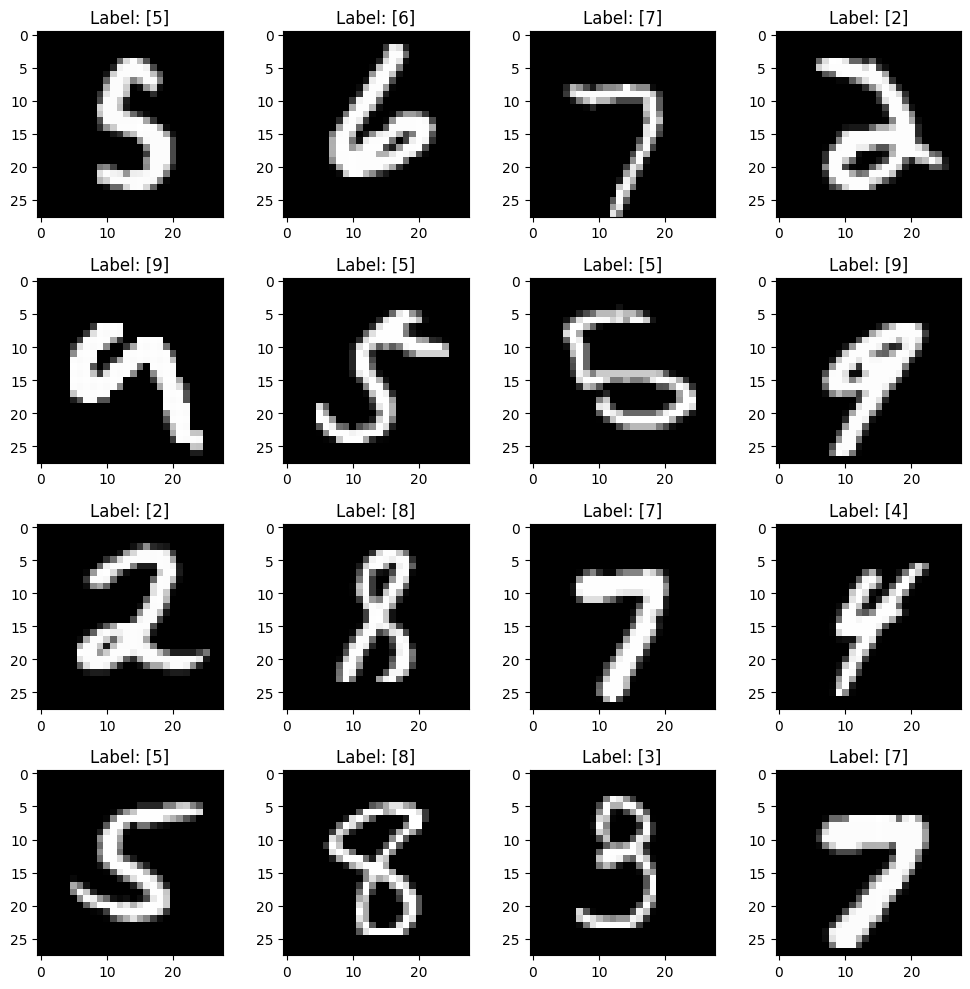

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
data_file='/content/model____23B0049______.pkl'
with open(data_file,'rb') as infile:
  train_dataset=pickle.load(infile)



grid_size=4
grid_size=4




fig,ax=plt.subplots(grid_size,grid_size,figsize=(10,10))
random_indices = np.random.choice(len(X), size=16, replace=False)
for i in range(grid_size):
    for j in range(grid_size):

        random_index = np.random.choice(len(X))


        ax[i, j].imshow(X[random_index].reshape(28, 28), cmap="gray")


        ax[i, j].set_title(f"Label: {y[random_index]}")

    # Display the image and true/predicted labels
plt.tight_layout()
plt.show()










